# Calculate the color Y3-Y4 for different conditions of PWV


Author : Sylvie Dagoret-Campagne
- Date of creation :  July 10th 2016


- Original SED can be found here :

ftp://ftp.stsci.edu/cdbs/current_calspec/



In [182]:
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits


In [183]:
pwv_name=['pwv00_','pwv01_','pwv02_','pwv03_','pwv04_',
          'pwv05_','pwv10_','pwv15_','pwv20_','pwv25_','pwv30_','pwv35_','pwv40_',
          'pwv45_','pwv50_','pwv55_','pwv60_','pwv65_','pwv70_','pwv75_','pwv80_']

In [184]:
pwv_values=np.array([0.,0.1,0.2,0.3,0.4,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.0,6.5,7.,7.5,8.])

In [185]:
NBPWV=pwv_values.shape[0]

In [186]:
obj_name='hd163466'

# Y3

In [187]:
night_name='20160509-y3'

In [188]:
numstart=1
numstop=10

In [189]:
indexes_y3=np.arange(numstart,numstop+1)

In [190]:
NBFILES_Y3=indexes_y3.shape[0]

In [191]:
all_file_list_y3= []
for idx,pwvname in enumerate(pwv_name):
    filelist=['SEDPred_'+obj_name+'_'+night_name+'_'+pwvname+str(fileindex)+'.fits' for fileindex in indexes_y3 ]
    all_file_list_y3.append(filelist)

# Y4


In [192]:
night_name='20160509-y4'

In [193]:
numstart=1
numstop=8

In [194]:
indexes_y4=np.arange(numstart,numstop+1)

In [195]:
NBFILES_Y4=indexes_y4.shape[0]

In [196]:
all_file_list_y4= []
for idx,pwvname in enumerate(pwv_name):
    filelist=['SEDPred_'+obj_name+'_'+night_name+'_'+pwvname+str(fileindex)+'.fits' for fileindex in indexes_y4 ]
    all_file_list_y4.append(filelist)

In [197]:
all_file_list_y4[0]

['SEDPred_hd163466_20160509-y4_pwv00_1.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_2.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_3.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_4.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_5.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_6.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_7.fits',
 'SEDPred_hd163466_20160509-y4_pwv00_8.fits']

# Calculation of Flux and colors for each pwv

In [198]:
All_Fluxes_Y3=np.zeros(NBPWV)
All_Fluxes_Y4=np.zeros(NBPWV)
All_Colors_Y3Y4=np.zeros(NBPWV)

## Flux for Y3

In [199]:
fluxes_y3=np.zeros((NBPWV,NBFILES_Y3))

In [200]:
for idx1 in np.arange(NBPWV):
    for idx2 in  np.arange(NBFILES_Y3):
        filename = all_file_list_y3[idx1][idx2]
        hdulist = fits.open(filename)
        t=hdulist[1].data
        wl=t['WAVELENGTH']
        selected_bins=np.where(np.logical_and(wl>900.,wl<1080.))
        flx_array=t['SEDxQExATMxToptxY4']  # get the predicted experimental fluxes in all wl bin
        flx_array=flx_array[selected_bins]
        flx_sum=flx_array.sum()    # sum over all wavelength
        fluxes_y3[idx1,idx2]=flx_sum
        hdulist.close()

In [201]:
All_Fluxes_Y3=np.average(fluxes_y3,axis=1)

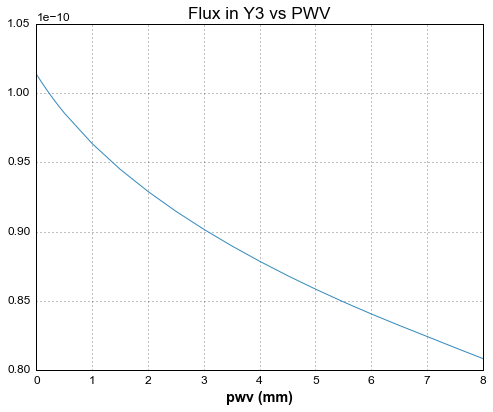

In [211]:
plt.plot(pwv_values,All_Fluxes_Y3)
plt.title('Flux in Y3 vs PWV')
plt.xlabel('pwv (mm)')

## Flux for Y4

In [203]:
fluxes_y4=np.zeros((NBPWV,NBFILES_Y4))

In [204]:
for idx1 in np.arange(NBPWV):
    for idx2 in  np.arange(NBFILES_Y4):
        filename = all_file_list_y4[idx1][idx2]
        hdulist = fits.open(filename)
        #print hdulist[1].columns
        t=hdulist[1].data
        wl=t['WAVELENGTH']
        selected_bins=np.where(np.logical_and(wl>900.,wl<1080.))
        flx_array=t['SEDxQExATMxToptxY3']  # get the predicted experimental fluxes in all wl bin
        flx_array=flx_array[selected_bins]
        flx_sum=flx_array.sum()    # sum over all wavelength
        fluxes_y4[idx1,idx2]=flx_sum
        hdulist.close()

In [205]:
All_Fluxes_Y4=np.average(fluxes_y4,axis=1)

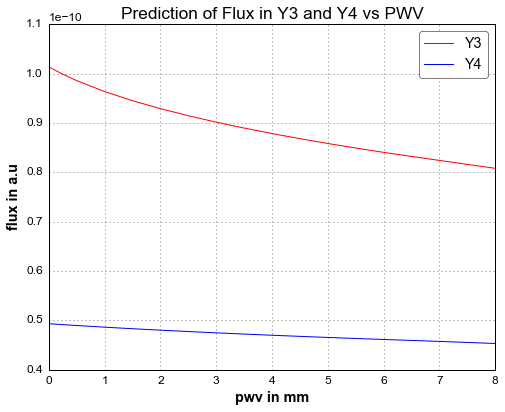

In [214]:
plt.plot(pwv_values,All_Fluxes_Y3,label='Y3',color='r')
plt.plot(pwv_values,All_Fluxes_Y4,label='Y4',color='b')
plt.title('Prediction of Flux in Y3 and Y4 vs PWV')
plt.xlabel('pwv in mm')
plt.ylabel('flux in a.u')
plt.legend()

In [207]:
Color=-2.5*np.log10(All_Fluxes_Y3/All_Fluxes_Y4)

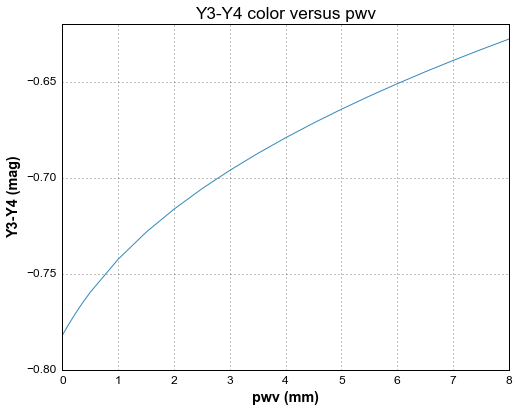

In [210]:
plt.plot(pwv_values,Color)
plt.xlabel('pwv (mm)')
plt.ylabel('Y3-Y4 (mag)')
plt.title('Y3-Y4 color versus pwv')